In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset (change filename if needed)
df = pd.read_csv("all_data.csv")

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [16]:
df.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [17]:
df = df[df['Order Date'] != 'Order Date']


In [18]:
df = df.dropna()


In [19]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


In [20]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

print("Total Sales:", round(df['Sales'].sum(), 2))


Total Sales: 34492035.97


In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')


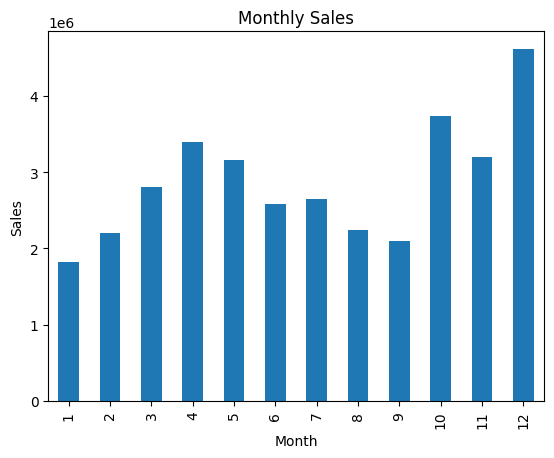

In [22]:
df['Month'] = df['Order Date'].dt.month

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [23]:
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
top_products


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Sales, dtype: float64

In [24]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

city_sales


City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

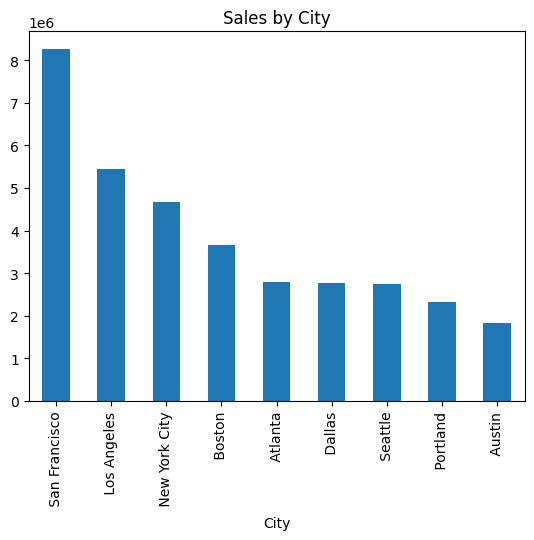

In [25]:
city_sales.plot(kind='bar')
plt.title("Sales by City")
plt.show()


## Business Insights

The analysis reveals that the MacBook Pro Laptop generated the highest revenue among all products. Sales increase significantly toward the end of the year, indicating strong holiday demand. San Francisco and Los Angeles emerge as top-performing cities, contributing substantially to overall revenue. Premium electronics account for the majority of sales, and a small number of products generate a large share of total revenue.
